<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>Classification - Passenger Satisfaction Prediction</center>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Dataset](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Exploration](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Exploratory Data Analysis](#section402)<br>
    - 4.2.2 [Plotting the Relationship Between Variables](#section40202)
  - 4.3 [Data PostProcessing and Feature Engineering](#section403)<br>
5. [Model Building](#section5)<br>
   - 5.1 [Logistic Regression Model](#section501)<br>
   - 5.2 [KNN](#section502)<br>
   - 5.3 [Random Forest Model](#section503)<br>
   - 5.4 [SVM](#section504)<br>
   - 5.5 [Hyperparameter Tuning of Model](#section505)<br>
6. [Model Evaluation](#section6)<br>
7. [Conclusion](#section7)
7. [Test set(Unknown data)](#section7)

<a id=section1></a>
## 1. Problem Statement

* Identifying weather a Passenger is __Satisfied__ or __Unsatisfied__ based on the flight travel history. As we can see this problem a __classification Problem__.

* So we have to apply classification machine learning algo like __Logistic Regression__, __Decision Tree__ and __Random Forest__.

<center><img style="width:90%; height:400px" src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/airIndia.jpg"  height="300" width="">

<a id=section2></a>
## 2. Importing Packages

In [ ]:
import numpy as np
np.set_printoptions(precision=4)                     # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)       # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)          # To display all the data in the columns.
pd.set_option('display.max_columns', None)           # To display all the columns.

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                   # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8)) 
import seaborn as sns                   # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                     # To suppress all the warnings in the notebook.


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,fbeta_score,make_scorer

<a id=section3></a>
## 3. Loading Data

In [ ]:
#Loading the train dataset
data_train = pd.read_csv("cust_train.csv")
data_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,satisfied


In [ ]:
data_test = pd.read_csv('cust_test.csv')
data_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


<a id=section301></a>
### 3.1 Description of the Dataset

* The dataset consist information of passenger borading and deboarding information and the services provided during the travel in flight.
* Dataset has __103904 Observation__ and __24 columns__. Below is the name of the column and their description.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

**Observation**

  - The train set has **83123 samples (rows)** and **24 columns**.

  - The test set has **20781 samples** and **23 columns**.
  
  - There are **19 columns** with a **numeric** datatype and **5 columns** with an **object** datatype.
  
  - There are **missing** values in the data.

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,83123.0,64971.539574,37465.886717,1.0,32552.5,64864.0,97430.5,129880.0
Age,83123.0,39.351106,15.099487,7.0,27.0,40.0,51.0,85.0
Flight Distance,83123.0,1190.686753,998.640016,31.0,413.0,844.0,1744.0,4983.0
Inflight wifi service,83123.0,2.732553,1.329950,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,83123.0,3.062269,1.526983,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,83123.0,2.756385,1.401047,0.0,2.0,3.0,4.0,5.0
Gate location,83123.0,2.978057,1.279064,0.0,2.0,3.0,4.0,5.0
Food and drink,83123.0,3.205286,1.330482,0.0,2.0,3.0,4.0,5.0
Online boarding,83123.0,3.252842,1.350905,0.0,2.0,3.0,4.0,5.0
Seat comfort,83123.0,3.442790,1.318317,0.0,2.0,4.0,5.0,5.0


In [ ]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20781.0,64734.896492,37455.816609,3.0,32489.0,64792.0,97095.0,129870.0
Age,20781.0,39.494105,15.176537,7.0,27.0,40.0,51.0,85.0
Flight Distance,20781.0,1184.494923,991.162378,31.0,421.0,835.0,1739.0,4983.0
Inflight wifi service,20781.0,2.718204,1.319284,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,20781.0,3.052404,1.517431,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,20781.0,2.758963,1.390460,0.0,2.0,3.0,4.0,5.0
Gate location,20781.0,2.972186,1.271853,1.0,2.0,3.0,4.0,5.0
Food and drink,20781.0,3.189500,1.325687,0.0,2.0,3.0,4.0,5.0
Online boarding,20781.0,3.240508,1.343898,0.0,2.0,3.0,4.0,5.0
Seat comfort,20781.0,3.425822,1.322110,1.0,2.0,4.0,5.0,5.0


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __bd_train_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [ ]:
# If pandas profiling gives an error, please update pandas-profiling by running this command in the comments below.
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 266kB 4.5MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 604kB 12.6MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 22.9MB/s 
     |████████████████████████████████| 296kB 41.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=b7924f81b46ab32065af160bde6670152b80b073fe115ad03b66402036143157
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=8b0ebb36b23142a31a9fef6aed1df94e18e6238c12c1f787cd576afa6f75e8ea
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# Performing pandas profiling before data preprocessing.
profile = ProfileReport(data_train, title='Pandas Profiling before Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [ ]:
# profile.to_file("data_train_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing on Train Set** <br><br>
__Dataset info__:
- **Number of variables**: 7
- **Number of observations**: 160
- **Missing cells**: 0 (< 0.0%)


__Variables types__: 
- **Numeric** = 3
- **Categorical** = 4


<br>



- **Id** has **unique values**

- We can see that the data is **imbalance** from the  **Drug** column.


<a id=section4></a>
## 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

In [ ]:
data_train.columns = map(str.lower, data_train.columns)   

In [ ]:
data_test.columns = map(str.lower, data_test.columns)   

In [ ]:
data_train.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
dct = {"customer type": "customer_type",
       "type of travel": "travel_type",
       "flight distance": "flight_distance",
       "inflight wifi service": "inflight_wifi_service",
       "departure/arrival time convenient": "departure_arrival_time_convenient",
       "ease of online booking": "ease-of_online_booking",
       "gate location": "gate_location",
       "food and drink": "food_and_drink",
       "online boarding": "online_boarding",
       "seat comfort": "seat_comfort",
       "inflight entertainment": "inflight_entertainment_rating",
       "on-board service": "on_board_service",
       "leg room service": "leg_room_service",
      "baggage handling": "baggage_handling",
      "checkin service": "checkin_service",
      "inflight service": "inflight_service",
      "departure delay in minutes": "departure_delay_in_minutes",
      "arrival delay in minutes": "arrival_delay_in_minutes"}

data_train.rename(columns=dct, inplace=True)
data_test.rename(columns=dct, inplace=True)

In [ ]:
data_train.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
travel_type                            0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease-of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment_rating          0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             251
satisfaction                           0
dtype: int64

In [ ]:
data_test.isnull().sum()

id                                    0
gender                                0
customer_type                         0
age                                   0
travel_type                           0
class                                 0
flight_distance                       0
inflight_wifi_service                 0
departure_arrival_time_convenient     0
ease-of_online_booking                0
gate_location                         0
food_and_drink                        0
online_boarding                       0
seat_comfort                          0
inflight_entertainment_rating         0
on_board_service                      0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
inflight_service                      0
cleanliness                           0
departure_delay_in_minutes            0
arrival_delay_in_minutes             59
dtype: int64

Replacing missing values with median

In [ ]:
data_train.arrival_delay_in_minutes = data_train.arrival_delay_in_minutes.fillna(data_train.arrival_delay_in_minutes.median())
data_train.arrival_delay_in_minutes = data_train.arrival_delay_in_minutes.apply(pd.to_numeric, errors='coerce')
data_train.arrival_delay_in_minutes = data_train.arrival_delay_in_minutes.fillna(data_train.arrival_delay_in_minutes.median())

In [ ]:
data_test.arrival_delay_in_minutes = data_test.arrival_delay_in_minutes.fillna(data_test.arrival_delay_in_minutes.median())
data_test.arrival_delay_in_minutes = data_test.arrival_delay_in_minutes.apply(pd.to_numeric, errors='coerce')
data_test.arrival_delay_in_minutes = data_test.arrival_delay_in_minutes.fillna(data_test.arrival_delay_in_minutes.median())

Performing Encoding

In [ ]:
le = LabelEncoder()
print (le)
data_train.gender = le.fit_transform(data_train.gender)
data_train.travel_type = le.fit_transform(data_train.travel_type)
data_train["class"] = le.fit_transform(data_train["class"])
data_train.satisfaction = le.fit_transform(data_train.satisfaction)
data_train.customer_type = le.fit_transform(data_train.customer_type)
data_train.head()

LabelEncoder()


,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease-of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,51032,0,0,30,1,1,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,0
1,54504,0,0,51,0,1,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,0
2,13387,1,1,27,0,1,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,1
3,17388,0,0,52,0,0,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,1
4,91598,0,1,15,0,1,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,1


In [ ]:
data_test.gender = le.fit_transform(data_test.gender)
data_test.travel_type = le.fit_transform(data_test.travel_type)
data_test["class"] = le.fit_transform(data_test["class"])
data_test.customer_type = le.fit_transform(data_test.customer_type)
data_test.head()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease-of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,23509,1,0,41,0,1,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,31011,0,0,18,0,0,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,29345,0,0,13,1,2,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,50242,1,1,23,0,1,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,22244,1,0,23,1,0,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


Dropping Unnecessary Columns

In [ ]:
data_train.drop("id", axis=1, inplace=True)

In [ ]:
data_test.drop("id", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_train[["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]])
scaled_df_test = scaler.fit_transform(data_test[["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]])

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns=["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"])

In [ ]:
scaled_df_test = pd.DataFrame(scaled_df_test, columns=["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"])

In [ ]:
data_train["age"] = scaled_df["age"]
data_train["flight_distance"] = scaled_df["flight_distance"]
data_train["departure_delay_in_minutes"] = scaled_df["departure_delay_in_minutes"]
data_train["arrival_delay_in_minutes"] = scaled_df["arrival_delay_in_minutes"]

In [ ]:
data_test["age"] = scaled_df_test["age"]
data_test["flight_distance"] = scaled_df_test["flight_distance"]
data_test["departure_delay_in_minutes"] = scaled_df_test["departure_delay_in_minutes"]
data_test["arrival_delay_in_minutes"] = scaled_df_test["arrival_delay_in_minutes"]

<a id=section402></a>
### 4.2 Exploratory Data Analysis

<a id=section40201></a>
#### 4.2.1 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __avocado_train_after_preprocessing.html__.

In [ ]:
# Performing pandas profiling after data preprocessing.
profile = ProfileReport(data_train, title='Pandas Profiling after Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file="avocado_train_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing**

<br> 

__Dataset info__:
- Number of variables: 12
- Number of observations: 3341
- Missing cells: 0 (< 0.0%)


__Variables types__: 
- Numeric = 9
- Categorical = 1
- Boolean = 2

<br> 
- Since we created **2** dummy (boolean) variables from our **`Sex`** column, the number of columns has increased to **12**.

---

Text(0, 0.5, 'Satisfaction')

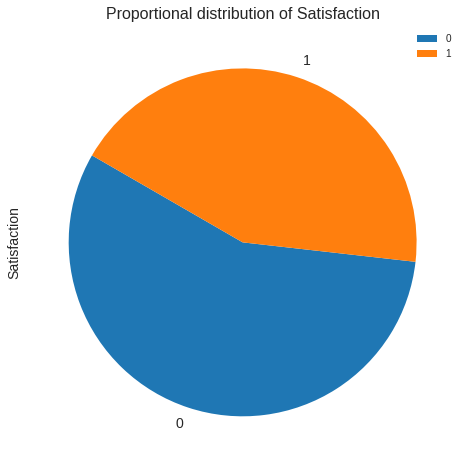

In [ ]:
# Plotting our dependent variable, y column

data_train['satisfaction'].value_counts().plot(kind='pie', startangle=150, legend=True, figsize=(8,8), fontsize=14)

plt.title('Proportional distribution of Satisfaction', fontsize=16)
plt.ylabel('Satisfaction', fontsize=14)

In [ ]:
corr = data_train.corr()

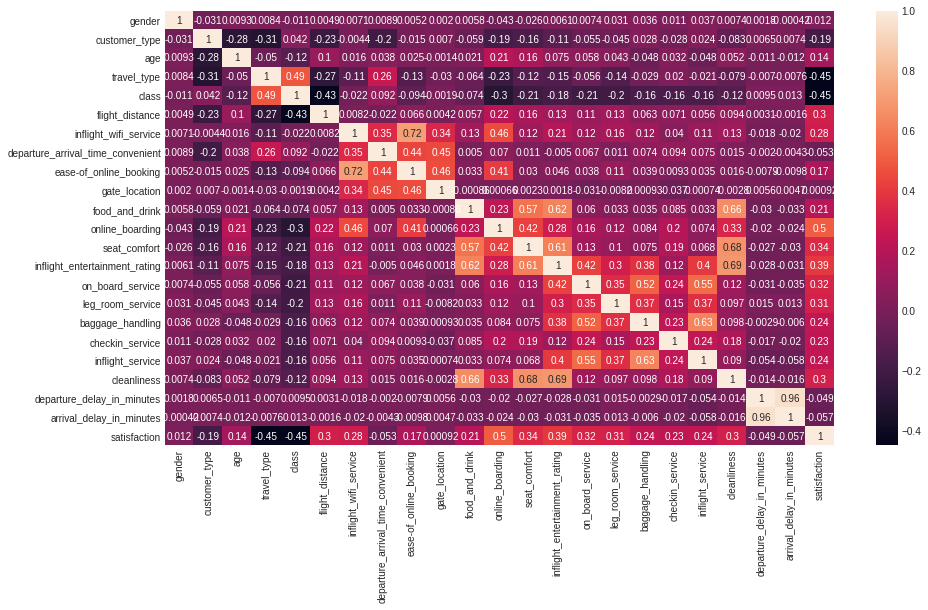

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

__Observation__

- The score of __gate_location__, __gender__ and __departure_arrival_time_convenient__ is very low.

<a id=section5></a>
## 5. Model Building

- First, we will split the dataset into **X** matrix and **y** vector format.

In [ ]:
X_train = data_train.drop(['satisfaction'], axis=1)
y_train = data_train['satisfaction']

In [ ]:
print('X_train shape:' , X_train.shape)
print('y_train shape:' , y_train.shape)

X_train shape: (83123, 22)
y_train shape: (83123,)


In [ ]:
X_test = data_test
print('X_test shape:' , X_test.shape)

X_test shape: (20781, 22)


<a id=section501></a>
### 5.1 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = logreg.predict(X_train)

In [ ]:
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))

Accuracy score of the train data is  0.8751609061270648


### 5.2 Decision Tree 

In [ ]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_train = dtc_model.predict(X_train)

In [ ]:
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))

Accuracy score of the train data is  1.0


<a id=section503></a>
### 5.3 Random Forest Model

In [ ]:
# Creating a Random Forest model.
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_train = rf.predict(X_train)

In [ ]:
# Making predictions on the test set
y_test_pred = rf.predict(X_test)

In [ ]:
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))

Accuracy score of the train data is  1.0


<a id=section6></a>
## 6. Model Evaluation

In [ ]:
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))

Accuracy score of the train data is  1.0
Accuracy score of the test data is  0.9621288677157018


**Making Submission File**

In [ ]:
y_sub_df = pd.DataFrame({'Id': data_test['Id'], 'predictions': y_test_pred})
y_sub_df.head()

,Id,predictions
0,11137,1.19285
1,16503,1.68045
2,6438,1.23170
3,8247,1.56180
4,10481,1.56065


In [ ]:
y_sub_df.to_csv('submission.csv', index=False, header=False)

---

<a id=section8></a>
## 8. Conclusion

 - We studied **in-depth** about the various **features** in the data, their **characteristics** and their **distributions**.

- We went through an **extensive** and **thorough** data analysis process, exploring various relationships between the different **features**.

- We **encoded** the *categorical data* and **removed** any *redundant columns* to make our dataset fit for training.

- We tested different models, performed **cross-validation** on them, and compared their performance.